<a href="https://colab.research.google.com/github/ksh168/Machine-Learning-projects/blob/master/Image%20Segmentation/Image_Segmentation.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import cv2
import matplotlib.pyplot as plt
import numpy as np

In [2]:
im = cv2.imread('8.jpg')
im = cv2.cvtColor(im, cv2.COLOR_BGR2RGB)
original_shape = im.shape
print(original_shape)

(682, 1024, 3)


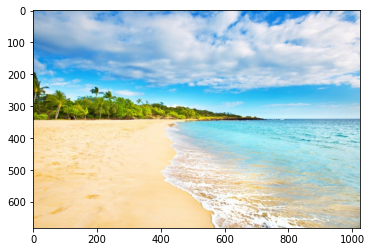

In [3]:
plt.imshow(im)
plt.show()

In [4]:
#Flatten each channel of the image

all_pixels = im.reshape((-1,3))
print(all_pixels.shape)

(698368, 3)


In [5]:
from sklearn.cluster import KMeans

In [6]:
dominant_colors = 4
km = KMeans(n_clusters = dominant_colors)
km.fit(all_pixels)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=4, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [7]:
centers = km.cluster_centers_
centers = np.array(centers, dtype='uint8')
print(centers)

[[175 210 227]
 [104 112  25]
 [242 222 187]
 [ 85 176 226]]


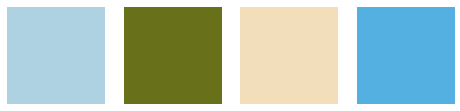

In [8]:
# Plot the colors found

i=1
plt.figure(0, figsize=(8,2))

colors = []

for each_color in centers:
    plt.subplot(1,4,i)
    plt.axis('off')
    i += 1
    
    colors.append(each_color)
    
    #Color Swatch
    a = np.zeros((100,100,3), dtype='uint8')
    a[:,:,:] = each_color
    
    plt.imshow(a)
    
plt.show()

### Segmenting the original image

In [9]:
km.labels_

array([3, 3, 3, ..., 0, 0, 0], dtype=int32)

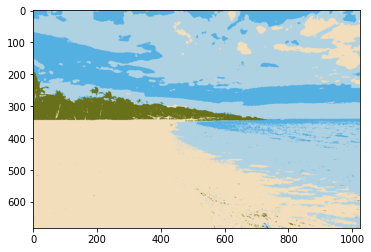

In [10]:
new_img = np.zeros((original_shape[0]*original_shape[1], 3), dtype='uint8')

for ix in range(new_img.shape[0]):
    new_img[ix] = colors[km.labels_[ix]]
    
new_img = new_img.reshape((original_shape))
plt.imshow(new_img)
plt.show()